In [2]:
import yahoo_fin.stock_info as si
import pandas as pd
import nsepy
import numpy as np

In [2]:
import requests # for http requests
from bs4 import BeautifulSoup # for html parsing and scraping
from fastnumbers import isfloat 
from fastnumbers import fast_float
from multiprocessing.dummy import Pool as ThreadPool 
import bs4


In [3]:
def ffloat(string):
    if string is None:
        return np.nan
    if type(string)==float or type(string)==np.float64:
        return string
    if type(string)==int or type(string)==np.int64:
        return string
    return fast_float(string.split(" ")[0].replace(',','').replace('%',''),
                      default=np.nan)

In [4]:
def get_table( url):
#     round_url = f'{url}/{round}'
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    rows = []
    for child in soup.find_all('table')[1].children:
        row = []
        for td in child:
            try:
                row.append(td.text.replace('\n', ''))
            except:
                continue
        if len(row) > 0:
            rows.append(row)

    df = pd.DataFrame(rows[1:], columns=rows[0])
    return df

# for round in range(1, 39):
#     table = get_table(round)
#     table.to_csv(f'PL_table_matchweek_{round}.csv', index=False)
#     sleep(np.random.randint(1, 10))

##### URLs

In [5]:
# Balance Sheet
tatapwr_bs_url ='https://www.moneycontrol.com/financials/tatapowercompany/balance-sheetVI/TPC'
suzlon_bs_url ='https://www.moneycontrol.com/financials/suzlonenergy/balance-sheetVI/SE17'
jppower_bs_url ='https://www.moneycontrol.com/financials/jaiprakashpowerventures/balance-sheetVI/JHP01'
pfs_bs_url = 'https://www.moneycontrol.com/financials/ptcindia/balance-sheetVI/PTC02'

# PnL
tatapwr_pnl_url ='https://www.moneycontrol.com/financials/tatapowercompany/profit-lossVI/TPC'
suzlon_pnl_url ='https://www.moneycontrol.com/financials/suzlonenergy/profit-lossVI/SE17'
jppower_pnl_url ='https://www.moneycontrol.com/financials/jaiprakashpowerventures/profit-lossVI/JHP01'
pfs_pnl_url = 'https://www.moneycontrol.com/financials/ptcindia/profit-lossVI/PTC02'

# Cash Statement
tatapwr_cs_url ='https://www.moneycontrol.com/financials/tatapowercompany/cash-flowVI/TPC'
suzlon_cs_url ='https://www.moneycontrol.com/financials/suzlonenergy/cash-flowVI/se17'
jppower_cs_url ='https://www.moneycontrol.com/financials/jaiprakashpowerventures/cash-flowVI/JHP01'
pfs_cs_url = 'https://www.moneycontrol.com/financials/ptcindia/cash-flowVI/ptc02'

###### Power NIFTY Stocks

####### BalanceSheet

In [6]:

# ADANIGREEN , POWERGRID ONGC HINDPETRO  GAIL  NTPC RELIANCE BPCL  TATAPOWER  IOC

adanigreen_bs_url ='https://www.moneycontrol.com/financials/adanigreenenergylimited/balance-sheetVI/ADANI54145'
powergrid_bs_url ='https://www.moneycontrol.com/financials/powergridcorporationindia/balance-sheetVI/PGC'
ongc_bs_url ='https://www.moneycontrol.com/financials/oilnaturalgascorporation/balance-sheetVI/ONG'
gail_bs_url = 'https://www.moneycontrol.com/financials/gailindia/balance-sheetVI/GAI'
ntpc_bs_url = 'https://www.moneycontrol.com/financials/ntpc/balance-sheetVI/NTP'
hindpetro_bs_url = 'https://www.moneycontrol.com/financials/hindustanpetroleumcorporation/balance-sheetVI/HPC'
reiance_bs_url = 'https://www.moneycontrol.com/financials/relianceindustries/balance-sheetVI/RI'
bpcl_bs_url = 'https://www.moneycontrol.com/financials/bharatpetroleumcorporation/balance-sheetVI/BPC'
ioc_bs_url = 'https://www.moneycontrol.com/financials/indianoilcorporation/balance-sheetVI/IOC'

In [7]:
adanigreen_pnl_url ='https://www.moneycontrol.com/financials/adanigreenenergylimited/profit-lossVI/ADANI54145'
powergrid_pnl_url ='https://www.moneycontrol.com/financials/powergridcorporationindia/profit-lossVI/PGC'
ongc_pnl_url ='https://www.moneycontrol.com/financials/oilnaturalgascorporation/profit-lossVI/ONG'
gail_pnl_url = 'https://www.moneycontrol.com/financials/gailindia/profit-lossVI/GAI'
ntpc_pnl_url = 'https://www.moneycontrol.com/financials/ntpc/profit-lossVI/NTP'
hindpetro_pnl_url = 'https://www.moneycontrol.com/financials/hindustanpetroleumcorporation/profit-lossVI/HPC'
reiance_pnl_url = 'https://www.moneycontrol.com/financials/relianceindustries/profit-lossVI/RI'
bpcl_pnl_url = 'https://www.moneycontrol.com/financials/bharatpetroleumcorporation/profit-lossVI/BPC'
ioc_pnl_url = 'https://www.moneycontrol.com/financials/indianoilcorporation/profit-lossVI/IOC'

In [8]:
adanigreen_cs_url ='https://www.moneycontrol.com/financials/adanigreenenergylimited/cash-flowVI/ADANI54145'
powergrid_cs_url ='https://www.moneycontrol.com/financials/powergridcorporationindia/cash-flowVI/PGC'
ongc_cs_url ='https://www.moneycontrol.com/financials/oilnaturalgascorporation/cash-flowVI/ONG'
gail_cs_url = 'https://www.moneycontrol.com/financials/gailindia/cash-flowVI/GAI'
ntpc_cs_url = 'https://www.moneycontrol.com/financials/ntpc/cash-flowVI/NTP'
hindpetro_cs_url = 'https://www.moneycontrol.com/financials/hindustanpetroleumcorporation/cash-flowVI/HPC'
reiance_cs_url = 'https://www.moneycontrol.com/financials/relianceindustries/cash-flowVI/RI'
bpcl_cs_url = 'https://www.moneycontrol.com/financials/bharatpetroleumcorporation/cash-flowVI/BPC'
ioc_cs_url = 'https://www.moneycontrol.com/financials/indianoilcorporation/cash-flowVI/IOC'

In [9]:
urls = [tatapwr_bs_url,suzlon_bs_url]

In [10]:
for i in urls:
#     print(vars()["v%s" % i])

    vars()["v%s" % i] =  get_table(i)
#    "a" + str(i) 

In [11]:
vtatapwr_bs_url

NameError: name 'vtatapwr_bs_url' is not defined

In [12]:
# Loading Balance Sheet URL
tatapwr_bs = get_table( tatapwr_bs_url)
suzlon_bs = get_table( suzlon_bs_url)
jppower_bs = get_table( jppower_bs_url)
pfs_bs = get_table( pfs_bs_url)

# Loading PnL URL
tatapwr_pnl = get_table( tatapwr_pnl_url)
suzlon_pnl = get_table( suzlon_pnl_url)
jppower_pnl = get_table( jppower_pnl_url)
pfs_pnl = get_table( pfs_pnl_url)

# Loading CS URL
tatapwr_cs = get_table( tatapwr_cs_url)
suzlon_cs = get_table( suzlon_cs_url)
jppower_cs = get_table( jppower_cs_url)
pfs_cs = get_table( pfs_cs_url)

In [13]:
# Power Index
adanigreen_bs = get_table( adanigreen_bs_url)
powergrid_bs = get_table( powergrid_bs_url)
ongc_bs = get_table( ongc_bs_url)
gail_bs = get_table( gail_bs_url)
ntpc_bs = get_table( ntpc_bs_url)
hindpetro_bs = get_table( hindpetro_bs_url)
reiance_bs = get_table( reiance_bs_url)
bpcl_bs = get_table( bpcl_bs_url)
ioc_bs = get_table( ioc_bs_url)

# Loading PnL URL
adanigreen_pnl = get_table( adanigreen_pnl_url)
powergrid_pnl = get_table( powergrid_pnl_url)
ongc_pnl = get_table( ongc_pnl_url)
gail_pnl = get_table( gail_pnl_url)
ntpc_pnl = get_table( ntpc_pnl_url)
hindpetro_pnl = get_table( hindpetro_pnl_url)
reiance_pnl = get_table( reiance_pnl_url)
bpcl_pnl = get_table( bpcl_pnl_url)
ioc_pnl = get_table( ioc_pnl_url)

# Loading CS URL
adanigreen_cs = get_table( adanigreen_cs_url)
powergrid_cs = get_table( powergrid_cs_url)
ongc_cs = get_table( ongc_cs_url)
gail_cs = get_table( gail_cs_url)

ntpc_cs = get_table( ntpc_cs_url)
hindpetro_cs = get_table( hindpetro_cs_url)
reiance_cs = get_table( reiance_cs_url)
bpcl_cs = get_table( bpcl_cs_url)

ioc_cs = get_table( ioc_cs_url)

In [14]:
def rel(res):
    res = res.apply(lambda x: x.str.replace(',', ''))
    return res

In [15]:
pfs_pnl = rel(pfs_pnl)
tatapwr_pnl = rel(tatapwr_pnl)
suzlon_pnl = rel(suzlon_pnl)
jppower_pnl = rel(jppower_pnl)

pfs_cs = rel(pfs_cs)
tatapwr_cs = rel(tatapwr_cs)
suzlon_cs = rel(suzlon_cs)
jppower_cs = rel(jppower_cs)

pfs_bs = rel(pfs_bs)
tatapwr_bs = rel(tatapwr_bs)
suzlon_bs = rel(suzlon_bs)
jppower_bs = rel(jppower_bs)

In [16]:
# Index stocks
adanigreen_bs = rel(adanigreen_bs)
powergrid_bs = rel(powergrid_bs)
ongc_bs = rel(ongc_bs)
gail_bs = rel(gail_bs)
ntpc_bs = rel(ntpc_bs)
hindpetro_bs = rel(hindpetro_bs)
reiance_bs = rel(reiance_bs)
bpcl_bs = rel(bpcl_bs)
ioc_bs = rel(ioc_bs)

adanigreen_cs = rel(adanigreen_cs)
powergrid_cs = rel(powergrid_cs)
ongc_cs = rel(ongc_cs)
gail_cs = rel(gail_cs)
ntpc_cs = rel(ntpc_cs)
hindpetro_cs = rel(hindpetro_cs)
reiance_cs = rel(reiance_cs)
bpcl_cs = rel(bpcl_cs)
ioc_cs = rel(ioc_cs)

adanigreen_pnl = rel(adanigreen_pnl)
powergrid_pnl = rel(powergrid_pnl)
ongc_pnl = rel(ongc_pnl)
gail_pnl = rel(gail_pnl)
ntpc_pnl = rel(ntpc_pnl)
hindpetro_pnl = rel(hindpetro_pnl)
reiance_pnl = rel(reiance_pnl)
bpcl_pnl = rel(bpcl_pnl)
ioc_pnl = rel(ioc_pnl)

In [155]:
 ((tatapwr_pnl[tatapwr_pnl.iloc[:, 1] == 'Total Revenue']['Mar 18']).astype('float').values / (tatapwr_pnl[tatapwr_pnl.iloc[:, 1] == 'Total Revenue']['Mar 17']).astype('float').values - 1)*100


array([6.90817388])

In [17]:
def cagr(stock, mode):

    cagr18 = ((stock[stock.iloc[:, 1] == mode]['Mar 18']).astype('float').values / (stock[stock.iloc[:, 1] == mode]['Mar 17']).astype('float').values - 1)*100
    cagr19 = ((stock[stock.iloc[:, 1] == mode]['Mar 19']).astype('float').values / (stock[stock.iloc[:, 1] == mode]['Mar 18']).astype('float').values - 1)*100
    cagr20 = ((stock[stock.iloc[:, 1] == mode]['Mar 20']).astype('float').values / (stock[stock.iloc[:, 1] == mode]['Mar 19']).astype('float').values - 1)*100
    cagr21 = ((stock[stock.iloc[:, 1] == mode]['Mar 21']).astype('float').values / (stock[stock.iloc[:, 1] == mode]['Mar 20']).astype('float').values - 1)*100

    return cagr21, cagr20, cagr19, cagr18

In [18]:
def value(stock, mode):
    value18 = (stock[stock.iloc[:, 1] == mode]['Mar 18']).astype('float').values
    value19 = (stock[stock.iloc[:, 1] == mode]['Mar 19']).astype('float').values
    value20 = (stock[stock.iloc[:, 1] == mode]['Mar 20']).astype('float').values
    value21 = (stock[stock.iloc[:, 1] == mode]['Mar 21']).astype('float').values
    return value21, value20, value19, value18

In [156]:
# Total Revenue CAGR
cagr_pfs_revenue21, cagr_pfs_revenue20, cagr_pfs_revenue19, cagr_pfs_revenue18  = cagr(pfs_pnl,'Total Revenue')
cagr_tatapwr_revenue21, cagr_tatapwr_revenue20, cagr_tatapwr_revenue19, cagr_tatapwr_revenue18  = cagr(tatapwr_pnl,'Total Revenue')
cagr_suzlon_revenue21, cagr_suzlon_revenue20, cagr_suzlon_revenue19, cagr_suzlon_revenue18  = cagr(suzlon_pnl,'Total Revenue')
cagr_jppower_revenue21, cagr_jppower_revenue20, cagr_jppower_revenue19, cagr_jppower_revenue18  = cagr(jppower_pnl,'Total Revenue')

In [157]:
cagr_tatapwr_revenue18

array([6.90817388])

In [20]:
# Index Total Revenue CAGR


cagr_adanigreen_revenue21, cagr_adanigreen_revenue20, cagr_adanigreen_revenue19, cagr_adanigreen_revenue18  = cagr(adanigreen_pnl,'Total Revenue')
cagr_powergrid_revenue21, cagr_powergrid_revenue20, cagr_powergrid_revenue19, cagr_powergrid_revenue18  = cagr(powergrid_pnl,'Total Revenue')
cagr_ongc_revenue21, cagr_ongc_revenue20, cagr_ongc_revenue19, cagr_ongc_revenue18  = cagr(ongc_pnl,'Total Revenue')
cagr_gail_revenue21, cagr_gail_revenue20, cagr_gail_revenue19, cagr_gail_revenue18  = cagr(gail_pnl,'Total Revenue')

cagr_ntpc_revenue21, cagr_ntpc_revenue20, cagr_ntpc_revenue19, cagr_ntpc_revenue18  = cagr(ntpc_pnl,'Total Revenue')
cagr_hindpetro_revenue21, cagr_hindpetro_revenue20, cagr_hindpetro_revenue19, cagr_hindpetro_revenue18  = cagr(hindpetro_pnl,'Total Revenue')
cagr_reiance_revenue21, cagr_reiance_revenue20, cagr_reiance_revenue19, cagr_reiance_revenue18  = cagr(reiance_pnl,'Total Revenue')
cagr_bpcl_revenue21, cagr_bpcl_revenue20, cagr_bpcl_revenue19, cagr_bpcl_revenue18  = cagr(bpcl_pnl,'Total Revenue')

cagr_ioc_revenue21, cagr_ioc_revenue20, cagr_ioc_revenue19, cagr_ioc_revenue18  = cagr(ioc_pnl,'Total Revenue')

In [21]:
# Profit CAGR
cagr_pfs_profit21, cagr_pfs_profit20, cagr_pfs_profit19, cagr_pfs_profit18  = cagr(pfs_pnl,'Profit/Loss For The Period')
cagr_tatapwr_profit21, cagr_tatapwr_profit20, cagr_tatapwr_profit19, cagr_tatapwr_profit18  = cagr(tatapwr_pnl,'Profit/Loss For The Period')
cagr_suzlon_profit21, cagr_suzlon_profit20, cagr_suzlon_profit19, cagr_suzlon_profit18  = cagr(suzlon_pnl,'Profit/Loss For The Period')
cagr_jppower_profit21, cagr_jppower_profit20, cagr_jppower_profit19, cagr_jppower_profit18  = cagr(jppower_pnl,'Profit/Loss For The Period')

In [22]:
# Index Prpfit CAGR

cagr_adanigreen_profit21, cagr_adanigreen_profit20, cagr_adanigreen_profit19, cagr_adanigreen_profit18  = cagr(adanigreen_pnl,'Profit/Loss For The Period')
cagr_powergrid_profit21, cagr_powergrid_profit20, cagr_powergrid_profit19, cagr_powergrid_profit18  = cagr(powergrid_pnl,'Profit/Loss For The Period')
cagr_ongc_profit21, cagr_ongc_profit20, cagr_ongc_profit19, cagr_ongc_profit18  = cagr(ongc_pnl,'Profit/Loss For The Period')
cagr_gail_profit21, cagr_gail_profit20, cagr_gail_profit19, cagr_gail_profit18  = cagr(gail_pnl,'Profit/Loss For The Period')

cagr_ntpc_profit21, cagr_ntpc_profit20, cagr_ntpc_profit19, cagr_ntpc_profit18  = cagr(ntpc_pnl,'Profit/Loss For The Period')
cagr_hindpetro_profit21, cagr_hindpetro_profit20, cagr_hindpetro_profit19, cagr_hindpetro_profit18  = cagr(hindpetro_pnl,'Profit/Loss For The Period')
cagr_reiance_profit21, cagr_reiance_profit20, cagr_reiance_profit19, cagr_reiance_profit18  = cagr(reiance_pnl,'Profit/Loss For The Period')
cagr_bpcl_profit21, cagr_bpcl_profit20, cagr_bpcl_profit19, cagr_bpcl_profit18  = cagr(bpcl_pnl,'Profit/Loss For The Period')

cagr_ioc_profit21, cagr_ioc_profit20, cagr_ioc_profit19, cagr_ioc_profit18  = cagr(ioc_pnl,'Profit/Loss For The Period')

In [23]:
# EBITDA CAGR
cagr_pfs_EBITDA21, cagr_pfs_EBITDA20, cagr_pfs_EBITDA19, cagr_pfs_EBITDA18  = cagr(pfs_pnl,'Profit/Loss Before Exceptional ExtraOrdinary Items And Tax')
cagr_tatapwr_EBITDA21, cagr_tatapwr_EBITDA20, cagr_tatapwr_EBITDA19, cagr_tatapwr_EBITDA18  = cagr(tatapwr_pnl,'Profit/Loss Before Exceptional ExtraOrdinary Items And Tax')
cagr_suzlon_EBITDA21, cagr_suzlon_EBITDA20, cagr_suzlon_EBITDA19, cagr_suzlon_EBITDA18  = cagr(suzlon_pnl,'Profit/Loss Before Exceptional ExtraOrdinary Items And Tax')
cagr_jppower_EBITDA21, cagr_jppower_EBITDA20, cagr_jppower_EBITDA19, cagr_jppower_EBITDA18  = cagr(jppower_pnl,'Profit/Loss Before Exceptional ExtraOrdinary Items And Tax')

In [24]:
# Index EBITDA CAGR
cagr_adanigreen_EBITDA21, cagr_adanigreen_EBITDA20, cagr_adanigreen_EBITDA19, cagr_adanigreen_EBITDA18  = cagr(adanigreen_pnl,'Profit/Loss Before Exceptional ExtraOrdinary Items And Tax')
cagr_powergrid_EBITDA21, cagr_powergrid_EBITDA20, cagr_powergrid_EBITDA19, cagr_powergrid_EBITDA18  = cagr(powergrid_pnl,'Profit/Loss Before Exceptional ExtraOrdinary Items And Tax')
cagr_ongc_EBITDA21, cagr_ongc_EBITDA20, cagr_ongc_EBITDA19, cagr_ongc_EBITDA18  = cagr(ongc_pnl,'Profit/Loss Before Exceptional ExtraOrdinary Items And Tax')
cagr_gail_EBITDA21, cagr_gail_EBITDA20, cagr_gail_EBITDA19, cagr_gail_EBITDA18  = cagr(gail_pnl,'Profit/Loss Before Exceptional ExtraOrdinary Items And Tax')

cagr_ntpc_EBITDA21, cagr_ntpc_EBITDA20, cagr_ntpc_EBITDA19, cagr_ntpc_EBITDA18  = cagr(ntpc_pnl,'Profit/Loss Before Exceptional ExtraOrdinary Items And Tax')
cagr_hindpetro_EBITDA21, cagr_hindpetro_EBITDA20, cagr_hindpetro_EBITDA19, cagr_hindpetro_EBITDA18  = cagr(hindpetro_pnl,'Profit/Loss Before Exceptional ExtraOrdinary Items And Tax')
cagr_reiance_EBITDA21, cagr_reiance_EBITDA20, cagr_reiance_EBITDA19, cagr_reiance_EBITDA18  = cagr(reiance_pnl,'Profit/Loss Before Exceptional ExtraOrdinary Items And Tax')
cagr_bpcl_EBITDA21, cagr_bpcl_EBITDA20, cagr_bpcl_EBITDA19, cagr_bpcl_EBITDA18  = cagr(bpcl_pnl,'Profit/Loss Before Exceptional ExtraOrdinary Items And Tax')

cagr_ioc_EBITDA21, cagr_ioc_EBITDA20, cagr_ioc_EBITDA19, cagr_ioc_EBITDA18  = cagr(ioc_pnl,'Profit/Loss Before Exceptional ExtraOrdinary Items And Tax')

In [25]:
# Operating Cash Flow
value_pfs_operatingcashflow_21, value_pfs_operatingcashflow_20, value_pfs_operatingcashflow_19, value_pfs_operatingcashflow_18  = value(pfs_cs,'Net CashFlow From Operating Activities')
value_tatapwr_operatingcashflow_21, value_tatapwr_operatingcashflow_20, value_tatapwr_operatingcashflow_19, value_tatapwr_operatingcashflow_18  = value(tatapwr_cs,'Net CashFlow From Operating Activities')
value_suzlon_operatingcashflow_21, value_suzlon_operatingcashflow_20, value_suzlon_operatingcashflow_19, value_suzlon_operatingcashflow_18  = value(suzlon_cs,'Net CashFlow From Operating Activities')
value_jppower_operatingcashflow_21, value_jppower_operatingcashflow_20, value_jppower_operatingcashflow_19, value_jppower_operatingcashflow_18  = value(jppower_cs,'Net CashFlow From Operating Activities')

In [48]:
# Index Operating Cash Flow
value_adanigreen_operatingcashflow_21, value_adanigreen_operatingcashflow_20, value_adanigreen_operatingcashflow_19, value_adanigreen_operatingcashflow_18  = value(adanigreen_cs,'Net CashFlow From Operating Activities')
value_powergrid_operatingcashflow_21, value_powergrid_operatingcashflow_20, value_powergrid_operatingcashflow_19, value_powergrid_operatingcashflow_18  = value(powergrid_cs,'Net CashFlow From Operating Activities')
value_ongc_operatingcashflow_21, value_ongc_operatingcashflow_20, value_ongc_operatingcashflow_19, value_ongc_operatingcashflow_18  = value(ongc_cs,'Net CashFlow From Operating Activities')
value_gail_operatingcashflow_21, value_gail_operatingcashflow_20, value_gail_operatingcashflow_19, value_gail_operatingcashflow_18  = value(gail_cs,'Net CashFlow From Operating Activities')

value_ntpc_operatingcashflow_21, value_ntpc_operatingcashflow_20, value_ntpc_operatingcashflow_19, value_ntpc_operatingcashflow_18  = value(ntpc_cs,'Net CashFlow From Operating Activities')
value_hindpetro_operatingcashflow_21, value_hindpetro_operatingcashflow_20, value_hindpetro_operatingcashflow_19, value_hindpetro_operatingcashflow_18  = value(hindpetro_cs,'Net CashFlow From Operating Activities')
value_reiance_operatingcashflow_21, value_reiance_operatingcashflow_20, value_reiance_operatingcashflow_19, value_reiance_operatingcashflow_18  = value(reiance_cs,'Net CashFlow From Operating Activities')
value_bpcl_operatingcashflow_21, value_bpcl_operatingcashflow_20, value_bpcl_operatingcashflow_19, value_bpcl_operatingcashflow_18  = value(bpcl_cs,'Net CashFlow From Operating Activities')

value_ioc_operatingcashflow_21, value_ioc_operatingcashflow_20, value_ioc_operatingcashflow_19, value_ioc_operatingcashflow_18  = value(ioc_cs,'Net CashFlow From Operating Activities')


In [27]:
value_suzlon_operatingcashflow_19

array([449.86])

In [28]:
# # Fixed Assets
# value_pfs_FA_21, value_pfs_FA_20, value_pfs_FA_19, value_pfs_FA_18  = value(pfs_bs,'Fixed Assets')
# value_tatapwr_FA_21, value_tatapwr_FA_20, value_tatapwr_FA_19, value_tatapwr_FA_18  = value(tatapwr_cs,'Fixed Assets')
# value_suzlon_FA_21, value_suzlon_FA_20, value_suzlon_FA_19, value_suzlon_FA_18  = value(suzlon_cs,'Fixed Assets')
# value_jppower_FA_21, value_jppower_FA_20, value_jppower_FA_19, value_jppower_FA_18  = value(jppower_cs,'Fixed Assets')


In [29]:
def freecashflow(stockcs,stockbs):
    value18 = (stockcs[stockcs.iloc[:, 1] == 'Net CashFlow From Operating Activities']['Mar 18']).astype('float').values - (stockbs[stockbs.iloc[:, 1] == 'Fixed Assets']['Mar 18']).astype('float').values
    value19 = (stockcs[stockcs.iloc[:, 1] == 'Net CashFlow From Operating Activities']['Mar 19']).astype('float').values - (stockbs[stockbs.iloc[:, 1] == 'Fixed Assets']['Mar 19']).astype('float').values
    value20 = (stockcs[stockcs.iloc[:, 1] == 'Net CashFlow From Operating Activities']['Mar 20']).astype('float').values - (stockbs[stockbs.iloc[:, 1] == 'Fixed Assets']['Mar 20']).astype('float').values
    value21 = (stockcs[stockcs.iloc[:, 1] == 'Net CashFlow From Operating Activities']['Mar 21']).astype('float').values - (stockbs[stockbs.iloc[:, 1] == 'Fixed Assets']['Mar 21']).astype('float').values
    return value21, value20, value19, value18

In [30]:
value_pfs_freecashflow_21, value_pfs_freecashflow_20, value_pfs_freecashflow_19, value_pfs_freecashflow_18  = freecashflow(pfs_cs,pfs_bs)
value_suzlon_freecashflow_21, value_suzlon_freecashflow_20, value_suzlon_freecashflow_19, value_suzlon_freecashflow_18  =freecashflow(suzlon_cs,suzlon_bs)
value_tatapwr_freecashflow_21, value_tatapwr_freecashflow_20, value_tatapwr_freecashflow_19, value_tatapwr_freecashflow_18  =freecashflow(tatapwr_cs,tatapwr_bs)
value_jppower_freecashflow_21, value_jppower_freecashflow_20, value_jppower_freecashflow_19, value_jppower_freecashflow_18  =freecashflow(jppower_cs,suzlon_bs)

In [55]:
# Index Operating Cash Flow
value_adanigreen_freecashflow_21, value_adanigreen_freecashflow_20, value_adanigreen_freecashflow_19, value_adanigreen_freecashflow_18  = freecashflow(adanigreen_cs,adanigreen_bs)
value_powergrid_freecashflow_21, value_powergrid_freecashflow_20, value_powergrid_freecashflow_19, value_powergrid_freecashflow_18  = freecashflow(powergrid_cs,powergrid_bs)
value_ongc_freecashflow_21, value_ongc_freecashflow_20, value_ongc_freecashflow_19, value_ongc_freecashflow_18  = freecashflow(ongc_cs,ongc_bs)
value_gail_freecashflow_21, value_gail_freecashflow_20, value_gail_freecashflow_19, value_gail_freecashflow_18  = freecashflow(gail_cs,gail_bs)

value_ntpc_freecashflow_21, value_ntpc_freecashflow_20, value_ntpc_freecashflow_19, value_ntpc_freecashflow_18  = freecashflow(pfs_cs,pfs_bs)
value_hindpetro_freecashflow_21, value_hindpetro_freecashflow_20, value_hindpetro_freecashflow_19, value_hindpetro_freecashflow_18  = freecashflow(ntpc_cs,ntpc_bs)
value_reiance_freecashflow_21, value_reiance_freecashflow_20, value_reiance_freecashflow_19, value_reiance_freecashflow_18  = freecashflow(hindpetro_cs,hindpetro_bs)
value_bpcl_freecashflow_21, value_bpcl_freecashflow_20, value_bpcl_freecashflow_19, value_bpcl_freecashflow_18  = freecashflow(bpcl_cs,bpcl_bs)

value_ioc_freecashflow_21, value_ioc_freecashflow_20, value_ioc_freecashflow_19, value_ioc_freecashflow_18  = freecashflow(ioc_cs,ioc_bs)


In [32]:
### ROE
def ROE(stockpnl,stockbs):
    ROE18 = (stockpnl[stockpnl.iloc[:, 1] == 'Profit/Loss For The Period']['Mar 18']).astype('float').values / (stockbs[stockbs.iloc[:, 1] == 'Total Shareholders Funds']['Mar 18']).astype('float').values
    ROE19 = (stockpnl[stockpnl.iloc[:, 1] == 'Profit/Loss For The Period']['Mar 19']).astype('float').values / (stockbs[stockbs.iloc[:, 1] == 'Total Shareholders Funds']['Mar 19']).astype('float').values
    ROE20 = (stockpnl[stockpnl.iloc[:, 1] == 'Profit/Loss For The Period']['Mar 20']).astype('float').values / (stockbs[stockbs.iloc[:, 1] == 'Total Shareholders Funds']['Mar 20']).astype('float').values
    ROE21 = (stockpnl[stockpnl.iloc[:, 1] == 'Profit/Loss For The Period']['Mar 21']).astype('float').values / (stockbs[stockbs.iloc[:, 1] == 'Total Shareholders Funds']['Mar 21']).astype('float').values
    return ROE21, ROE20, ROE19, ROE18


In [33]:
value_pfs_roe_21, value_pfs_roe_20, value_pfs_roe_19, value_pfs_roe_18 = ROE(pfs_pnl,pfs_bs)
value_suzlon_roe_21, value_suzlon_roe_20, value_suzlon_roe_19, value_suzlon_roe_18 = ROE(suzlon_pnl,suzlon_bs)
value_tatapwr_roe_21, value_tatapwr_roe_20, value_tatapwr_roe_19, value_tatapwr_roe_18 = ROE(tatapwr_pnl,tatapwr_bs)
value_jppower_roe_21, value_jppower_roe_20, value_jppower_roe_19, value_jppower_roe_18 = ROE(jppower_pnl,jppower_bs)

In [34]:
# Index ROE 

value_adanigreen_roe_21, value_adanigreen_roe_20, value_adanigreen_roe_19, value_adanigreen_roe_18  = ROE(adanigreen_pnl,adanigreen_bs)
value_powergrid_roe_21, value_powergrid_roe_20, value_powergrid_roe_19, value_powergrid_roe_18  = ROE(powergrid_pnl,powergrid_bs)
value_ongc_roe_21, value_ongc_roe_20, value_ongc_roe_19, value_ongc_roe_18  = ROE(ongc_pnl,ongc_bs)
value_gail_roe_21, value_gail_roe_20, value_gail_roe_19, value_gail_roe_18  = ROE(gail_pnl,gail_bs)

value_ntpc_roe_21, value_ntpc_roe_20, value_ntpc_roe_19, value_ntpc_roe_18  = ROE(pfs_pnl,pfs_bs)
value_hindpetro_roe_21, value_hindpetro_roe_20, value_hindpetro_roe_19, value_hindpetro_roe_18  = ROE(ntpc_pnl,ntpc_bs)
value_reiance_roe_21, value_reiance_roe_20, value_reiance_roe_19, value_reiance_roe_18  = ROE(hindpetro_pnl,hindpetro_bs)
value_bpcl_roe_21, value_bpcl_roe_20, value_bpcl_roe_19, value_bpcl_roe_18  = ROE(bpcl_pnl,bpcl_bs)

value_ioc_roe_21, value_ioc_roe_20, value_ioc_roe_19, value_ioc_roe_18  = ROE(ioc_pnl,ioc_bs)


In [35]:
def DE(stockbs):
    DE18 = (stockbs[stockbs.iloc[:, 1] == 'Total Capital And Liabilities']['Mar 18']).astype('float').values / (stockbs[stockbs.iloc[:, 1] == 'Total Shareholders Funds']['Mar 18']).astype('float').values
    DE19 = (stockbs[stockbs.iloc[:, 1] == 'Total Capital And Liabilities']['Mar 19']).astype('float').values / (stockbs[stockbs.iloc[:, 1] == 'Total Shareholders Funds']['Mar 19']).astype('float').values
    DE20 = (stockbs[stockbs.iloc[:, 1] == 'Total Capital And Liabilities']['Mar 20']).astype('float').values / (stockbs[stockbs.iloc[:, 1] == 'Total Shareholders Funds']['Mar 20']).astype('float').values
    DE21 = (stockbs[stockbs.iloc[:, 1] == 'Total Capital And Liabilities']['Mar 21']).astype('float').values / (stockbs[stockbs.iloc[:, 1] == 'Total Shareholders Funds']['Mar 21']).astype('float').values
    return DE21, DE20, DE19, DE18


In [36]:
# (pfs_bs[pfs_bs.iloc[:, 1] == 'TOTAL CAPITAL AND LIABILITIES']['Mar 18']).astype('float').values 
# \/ (stockbs[stockbs.iloc[:, 1] == 'Total Shareholders Funds']['Mar 18']).astype('float').values


In [203]:
value_pfs_de21, value_pfs_de20, value_pfs_de19, value_pfs_de18 = DE(pfs_bs)
value_suzlon_de21, value_suzlon_de20, value_suzlon_de19, value_suzlon_de18 = DE(suzlon_bs)
value_tatapwr_de21, value_tatapwr_de20, value_tatapwr_de19, value_tatapwr_de18 = DE(tatapwr_bs)
value_jppower_de21, value_jppower_de20, value_jppower_de19, value_jppower_de18 = DE(jppower_bs)

In [52]:
# Index DE


value_adanigreen_de21, value_adanigreen_de20, value_adanigreen_de19, value_adanigreen_de18 = DE(adanigreen_bs)
value_powergrid_de21, value_powergrid_de20, value_powergrid_de19, value_powergrid_de18  = DE(powergrid_bs)
value_ongc_de21, value_ongc_de20, value_ongc_de19, value_ongc_de18  = DE(ongc_bs)
value_gail_de21, value_gail_de20, value_gail_de19, value_gail_de18  = DE(gail_bs)

value_ntpc_de21, value_ntpc_de20, value_ntpc_de19, value_ntpc_de18  = DE(ntpc_bs)
value_hindpetro_de21, value_hindpetro_de20, value_hindpetro_de19, value_hindpetro_de18  = DE(hindpetro_bs)
value_reiance_de21, value_reiance_de20, value_reiance_de19, value_reiance_de18  = DE(reiance_bs)
value_bpcl_de21, value_bpcl_de20, value_bpcl_de19, value_bpcl_de18  = DE(bpcl_bs)

value_ioc_de21, value_ioc_de20, value_ioc_de19, value_ioc_de18 = DE(ioc_bs)

In [39]:
value_pfs_de21

array([2.27015996])

In [40]:
##  Basic Ratio

In [4]:
ls = ['JPPOWER.NS','PFS.NS', 'SUZLON.NS','TATAPOWER.NS']

In [5]:
data = {}
dow_stats = pd.DataFrame()
for ticker in ls:
#     print(ticker)
    temp = si.get_stats_valuation(ticker)
    temp = temp.iloc[:,:2]
#     print(temp)
    temp.columns = ["Attribute", "Recent"]
    
    temp['Ticket'] = ticker
#     dow_stats = dow_stats.append(temp)
# data = pd.concat(dow_stats, axis=1)
    dow_stats = pd.concat([dow_stats, temp], axis=1)

In [43]:
def get_scrip_info(url):
    original_url = url
    key_val_pairs = {}
    
    page_response = requests.get(url, timeout=240)
    page_content = BeautifulSoup(page_response.content, "html.parser")
    name = page_content.find('h1').text


    volume = ffloat(page_content.find('td',{'class':'nsevol bsevol'}).text)
    eps = ffloat(page_content.find('td',{'class':'nseceps bseceps'}).text)
    pe = ffloat(page_content.find('td',{'class':'nsepe bsepe'}).text)
    sector_pe = ffloat(page_content.find('td',{'class':'nsesc_ttm bsesc_ttm'}).text)
    market_cap = ffloat(page_content.find('td',{'class':'nsemktcap bsemktcap'}).text)
    open_price = ffloat(page_content.find('td',{'class':'nsemktcap bsemktcap'}).text)
    opn_prc = ffloat(page_content.find('td',{'class':'nseopn bseopn'}).text)
    cls_prc = ffloat(page_content.find('td',{'class':'nseprvclose bseprvclose'}).text)
    vwap = ffloat(page_content.find('td',{'class':'nsevwap bsevwap'}).text)
    nsebeta = ffloat(page_content.find('td',{'class':'Beta'}))
    bsebeta = ffloat(page_content.find('td',{'class':'bsebeta'}))
    high = ffloat(page_content.find('td',{'class':'nseHP bseHP'}).text)
    low = ffloat(page_content.find('td',{'class':'nseLP bseLP'}).text)
    wh52 = ffloat(page_content.find('td',{'class':'nseH52 bseH52'}).text)
    wl52 = ffloat(page_content.find('td',{'class':'nseL52 bseL52'}).text)
    pb = ffloat(page_content.find('td',{'class':'nsepb bsepb'}).text)
    fv = ffloat(page_content.find('td',{'class':'nsefv bsefv'}).text)
    return high,low , name,nsebeta, volume, eps, pe, sector_pe, market_cap

In [44]:
pfs_high,pfs_low , pfs_name,pfs_nsebeta, pfs_volume, pfs_eps, pfs_pe, pfs_sector_pe, pfs_market_cap = get_scrip_info('https://www.moneycontrol.com/india/stockpricequote/trading/ptcindia/PTC02')
tatapowercompany_high,tatapowercompany_low , tatapowercompany_name,tatapowercompany_nsebeta, tatapowercompany_volume, tatapowercompany_eps, tatapowercompany_pe, tatapowercompany_sector_pe, tatapowercompany_market_cap = get_scrip_info('https://www.moneycontrol.com/india/stockpricequote/power-generationdistribution/tatapowercompany/TPC')
suzlon_high,pfs_low , suzlon_name,suzlon_nsebeta, suzlon_volume, suzlon_eps, suzlon_pe,suzlon_sector_pe, suzlon_market_cap = get_scrip_info('https://www.moneycontrol.com/india/stockpricequote/power-generationdistribution/suzlonenergy/SE17')
jppower_high,jppower_low , jppower_name,jppower_nsebeta, jppower_volume, jppower_eps, jppower_pe, jppower_sector_pe, jppower_market_cap = get_scrip_info('https://www.moneycontrol.com/india/stockpricequote/power-generationdistribution/jaiprakashpowerventures/JHP01')

In [45]:
## Index Stocks

adanigreen_high,adanigreen_low , adanigreen_name,adanigreen_nsebeta, adanigreen_volume, adanigreen_eps, adanigreen_pe, adanigreen_sector_pe, adanigreen_market_cap = get_scrip_info('https://www.moneycontrol.com/india/stockpricequote/power-generationdistribution/adanigreenenergylimited/ADANI54145')
powergrid_high,powergrid_low , powergrid_name,powergrid_nsebeta, powergrid_volume, powergrid_eps, powergrid_pe, powergrid_sector_pe, powergrid_market_cap = get_scrip_info('https://www.moneycontrol.com/india/stockpricequote/power-generationdistribution/powergridcorporationindia/PGC')
ongc_high,ongc_low , ongc_name,ongc_nsebeta, ongc_volume, ongc_eps, ongc_pe,ongc_sector_pe, ongc_market_cap = get_scrip_info('https://www.moneycontrol.com/india/stockpricequote/oil-drillingexploration/oilnaturalgascorporation/ONG')
gail_high,gail_low , gail_name,gail_nsebeta, gail_volume, gail_eps, gail_pe, gail_sector_pe, jppower_market_cap = get_scrip_info('https://www.moneycontrol.com/india/stockpricequote/oil-drillingexploration/gailindia/GAI')

ntpc_high,ntpc_low , ntpc_name,ntpc_nsebeta, ntpc_volume, ntpc_eps, ntpc_pe, ntpc_sector_pe, ntpc_market_cap = get_scrip_info('https://www.moneycontrol.com/india/stockpricequote/power-generationdistribution/ntpc/NTP')
hindpetro_high,hindpetro_low , hindpetro_name,hindpetro_nsebeta, hindpetro_volume, hindpetro_eps, hindpetro_pe, hindpetro_sector_pe, hindpetro_market_cap = get_scrip_info('https://www.moneycontrol.com/india/stockpricequote/refineries/hindustanpetroleumcorporation/HPC')
reiance_high,reiance_low , reiance_name,reiance_nsebeta, reiance_volume, reiance_eps, reiance_pe,reiance_sector_pe, reiance_market_cap = get_scrip_info('https://www.moneycontrol.com/india/stockpricequote/refineries/relianceindustries/RI')
bpcl_high,bpcl_low , bpcl_name,bpcl_nsebeta, bpcl_volume, bpcl_eps, bpcl_pe, bpcl_sector_pe, bpcl_market_cap = get_scrip_info('https://www.moneycontrol.com/india/stockpricequote/refineries/bharatpetroleumcorporation/BPC')

ioc_high,ioc_low , ioc_name,ioc_nsebeta,ioc_volume, ioc_eps, ioc_pe, ioc_sector_pe, ioc_market_cap = get_scrip_info('https://www.moneycontrol.com/india/stockpricequote/refineries/indianoilcorporation/IOC')


In [ ]:
def cagr(stock, mode):

    cagr18 = ((stock[stock.iloc[:, 1] == mode]['Mar 18']).astype('float').values / (stock[stock.iloc[:, 1] == mode]['Mar 17']).astype('float').values - 1)*100
    cagr19 = ((stock[stock.iloc[:, 1] == mode]['Mar 19']).astype('float').values / (stock[stock.iloc[:, 1] == mode]['Mar 18']).astype('float').values - 1)*100
    cagr20 = ((stock[stock.iloc[:, 1] == mode]['Mar 20']).astype('float').values / (stock[stock.iloc[:, 1] == mode]['Mar 19']).astype('float').values - 1)*100
    cagr21 = ((stock[stock.iloc[:, 1] == mode]['Mar 21']).astype('float').values / (stock[stock.iloc[:, 1] == mode]['Mar 20']).astype('float').values - 1)*100

    return cagr21, cagr20, cagr19, cagr18

In [94]:
def summation(stock, mode, year):
        summation = (stock[stock.iloc[:, 1] == mode][year]).astype('float').values
        return summation

In [ ]:
(stock[stock.iloc[:, 1] == mode][year]).astype('float').values

###### Create mean 10/02/22 onwards

In [8]:
index_stock_pnl = [powergrid_pnl,  adanigreen_pnl      ,ongc_pnl,gail_pnl,ntpc_pnl,hindpetro_pnl,reiance_pnl,bpcl_pnl,ioc_pnl,tatapwr_pnl]
index_stock_bs = [adanigreen_bs,powergrid_bs,ongc_bs,gail_bs,ntpc_bs,hindpetro_bs,reiance_bs,bpcl_bs,ioc_bs,tatapwr_bs]
index_stock_cs = [adanigreen_cs,powergrid_cs,ongc_cs,gail_cs,ntpc_cs,hindpetro_cs,reiance_cs,bpcl_cs,ioc_cs,tatapwr_cs]

Sum_Sales_average21 = 0
Sum_Sales_average20 = 0
Sum_Profit_average21 = 0
Sum_Profit_average20 = 0
Sum_EBITDA_average21 = 0 
Sum_EBITDA_average20 = 0
Sum_DEliabilities_average21 = 0
Sum_DE_fundaverage21 = 0
Sum_fixedassets_average21 = 0
Sum_operatingcashflow_average21 = 0

for i in index_stock_pnl:
    
    Sum_Sales_average21 = Sum_Sales_average21 + summation(i, 'Total Revenue', 'Mar 21')
    Sum_Sales_average20 = Sum_Sales_average20 + summation(i, 'Total Revenue', 'Mar 20')
    Sum_Profit_average21 = Sum_Profit_average21 + summation(i, 'Profit/Loss For The Period', 'Mar 21')
    Sum_Profit_average20 = Sum_Profit_average20 + summation(i, 'Profit/Loss For The Period', 'Mar 20')   
    Sum_EBITDA_average21 = Sum_EBITDA_average21 + summation(i, 'Profit/Loss Before Exceptional ExtraOrdinary Items And Tax', 'Mar 21')
    Sum_EBITDA_average20 = Sum_EBITDA_average20 + summation(i, 'Profit/Loss Before Exceptional ExtraOrdinary Items And Tax', 'Mar 20')  
    
for i in index_stock_bs:
    Sum_DEliabilities_average21 = Sum_DEliabilities_average21 + summation(i, 'Total Capital And Liabilities', 'Mar 21')
    Sum_DE_fundaverage21 = Sum_DE_fundaverage21 + summation(i, 'Total Shareholders Funds', 'Mar 21')
    Sum_fixedassets_average21 = Sum_fixedassets_average21 + summation(i, 'Fixed Assets', 'Mar 21')
    
# Sum_ROE_average21 = Sum_DE_average21

for i in index_stock_cs:
    Sum_operatingcashflow_average21 = Sum_operatingcashflow_average21 + summation(i, 'Net CashFlow From Operating Activities', 'Mar 21')



NameError: name 'powergrid_pnl' is not defined

In [ ]:
ROE18 = (stockpnl[stockpnl.iloc[:, 1] == 'Profit/Loss For The Period']['Mar 18']).astype('float').values / (stockbs[stockbs.iloc[:, 1] == 'Total Shareholders Funds']['Mar 18']).astype('float').values
DE18 = (stockbs[stockbs.iloc[:, 1] == 'Total Capital And Liabilities']['Mar 18']).astype('float').values / (stockbs[stockbs.iloc[:, 1] == 'Total Shareholders Funds']['Mar 18']).astype('float').values
    value18 = (stockcs[stockcs.iloc[:, 1] == 'Net CashFlow From Operating Activities']['Mar 18']).astype('float').values - (stockbs[stockbs.iloc[:, 1] == 'Fixed Assets']['Mar 18']).astype('float').values


In [124]:
len(index_stock_bs)

10

In [7]:
CAGR_AverageIndex_Sales21 = Sum_Sales_average21 / Sum_Sales_average20 -1 
CAGR_AverageIndexProfit21 =  Sum_Profit_average21 / Sum_Profit_average20 -1 
CAGR_AverageIndex_EBITDA21 = Sum_EBITDA_average21 / Sum_EBITDA_average20 - 1

ROE_AverageIndex21 = Sum_Profit_average21 / Sum_DE_fundaverage21 
DE_AverageIndex21 = Sum_DEliabilities_average21 / Sum_DE_fundaverage21 
Operatingcashflow_AverageIndex21 = Sum_operatingcashflow_average21 / len(index_stock_bs)
Fixedcashflow_AverageIndex21 = (Sum_operatingcashflow_average21 - Sum_fixedassets_average21) / len(index_stock_bs)
power_index.iloc[:,1:] =  power_index.iloc[:,1:].astype('int')
# Removin outlier PE
PE_AverageIndex21 = (power_index.iloc[4:5].sum(axis =1) + tatapowercompany_pe -adanigreen_pe ) / (len(index_stock_bs) -1)

NameError: name 'Sum_Sales_average21' is not defined

In [146]:
Operatingcashflow_AverageIndex21

array([17836.351])

#### CAGR_AverageIndex_Sales21

In [100]:
# (stockbs[stockbs.iloc[:, 1] == 'Fixed Assets']['Mar 18']).astype('float').values

array([134.26])

In [ ]:
cagr_adanigreen_revenue21, cagr_adanigreen_revenue20, cagr_adanigreen_revenue19, cagr_adanigreen_revenue18  = cagr(adanigreen_pnl,'Total Revenue')
cagr_powergrid_revenue21, cagr_powergrid_revenue20, cagr_powergrid_revenue19, cagr_powergrid_revenue18  = cagr(powergrid_pnl,'Total Revenue')
cagr_ongc_revenue21, cagr_ongc_revenue20, cagr_ongc_revenue19, cagr_ongc_revenue18  = cagr(ongc_pnl,'Total Revenue')
cagr_gail_revenue21, cagr_gail_revenue20, cagr_gail_revenue19, cagr_gail_revenue18  = cagr(gail_pnl,'Total Revenue')

cagr_ntpc_revenue21, cagr_ntpc_revenue20, cagr_ntpc_revenue19, cagr_ntpc_revenue18  = cagr(ntpc_pnl,'Total Revenue')
cagr_hindpetro_revenue21, cagr_hindpetro_revenue20, cagr_hindpetro_revenue19, cagr_hindpetro_revenue18  = cagr(hindpetro_pnl,'Total Revenue')
cagr_reiance_revenue21, cagr_reiance_revenue20, cagr_reiance_revenue19, cagr_reiance_revenue18  = cagr(reiance_pnl,'Total Revenue')
cagr_bpcl_revenue21, cagr_bpcl_revenue20, cagr_bpcl_revenue19, cagr_bpcl_revenue18  = cagr(bpcl_pnl,'Total Revenue')

cagr_ioc_revenue21, cagr_ioc_revenue20, cagr_ioc_revenue19, cagr_ioc_revenue18  = cagr(ioc_pnl,'Total Revenue')

### Creating DataFrame

In [46]:
pfs21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'PFS': [cagr_pfs_revenue21, cagr_pfs_profit21, cagr_pfs_EBITDA21, value_pfs_de21, pfs_pe, value_pfs_roe_21, value_pfs_operatingcashflow_21 ,value_pfs_freecashflow_21]})

tatapwr21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'TATAPOWER': [cagr_tatapwr_revenue21, cagr_tatapwr_profit21, cagr_tatapwr_EBITDA21, value_tatapwr_de_21,tatapowercompany_pe, value_tatapwr_roe_21, value_tatapwr_operatingcashflow_21 ,value_tatapwr_freecashflow_21]})


jppower21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'JPPOWER': [cagr_jppower_revenue21, cagr_jppower_profit21, cagr_jppower_EBITDA21, value_jppower_de21,jppower_pe, value_jppower_roe_21, value_jppower_operatingcashflow_21 ,value_jppower_freecashflow_21]})



suzlon21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'Suzlon': [cagr_suzlon_revenue21, cagr_suzlon_profit21, cagr_suzlon_EBITDA21, value_suzlon_de21,suzlon_pe, value_suzlon_roe_21, value_suzlon_operatingcashflow_21 ,value_suzlon_freecashflow_21]})



In [147]:

Average21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'Average21': [CAGR_AverageIndex_Sales21, CAGR_AverageIndexProfit21, CAGR_AverageIndex_EBITDA21, DE_AverageIndex21,PE_AverageIndex21, ROE_AverageIndex21, Operatingcashflow_AverageIndex21 ,Fixedcashflow_AverageIndex21]})



In [148]:
# CAGR_AverageIndex_Sales21 = Sum_Sales_average21 / Sum_Sales_average20 -1 
# CAGR_AverageIndexProfit21 =  Sum_Profit_average21 / Sum_Profit_average20 -1 
# CAGR_AverageIndex_EBITDA21 = Sum_EBITDA_average21 / Sum_EBITDA_average20 - 1

# ROE_AverageIndex21 = Sum_Profit_average21 / Sum_DE_fundaverage21 -1
# DE_AverageIndex21 = Sum_DEliabilities_average21 / Sum_DE_fundaverage21 -1
# Operatingcashflow_AverageIndex21 = Sum_operatingcashflow_average21 / len(index_stock_bs)
# Fixedcashflow_AverageIndex21 = (Sum_operatingcashflow_average21 - Sum_fixedassets_average21) / len(index_stock_bs)
# power_index.iloc[:,1:] =  power_index.iloc[:,1:].astype('int')
# # Removin outlier PE
# PE_AverageIndex21 = (power_index.iloc[4:5].sum(axis =1) + tatapowercompany_pe -adanigreen_pe ) / (len(index_stock_bs) -1)

In [ ]:
# adanigreen_cs_url ='https://www.moneycontrol.com/financials/adanigreenenergylimited/cash-flowVI/ADANI54145'
# powergrid_cs_url ='https://www.moneycontrol.com/financials/powergridcorporationindia/cash-flowVI/PGC'
# ongc_cs_url ='https://www.moneycontrol.com/financials/oilnaturalgascorporation/cash-flowVI/ONG'
# gail_cs_url = 'https://www.moneycontrol.com/financials/gailindia/cash-flowVI/GAI'
# ntpc_cs_url = 'https://www.moneycontrol.com/financials/ntpc/cash-flowVI/NTP'
# hindpetro_cs_url = 'https://www.moneycontrol.com/financials/hindustanpetroleumcorporation/cash-flowVI/HPC'
# reiance_cs_url = 'https://www.moneycontrol.com/financials/relianceindustries/cash-flowVI/RI'
# bpcl_cs_url = 'https://www.moneycontrol.com/financials/bharatpetroleumcorporation/cash-flowVI/BPC'
# ioc_cs_url = 'https://www.moneycontrol.com/financials/indianoilcorporation/cash-flowVI/IOC'

In [56]:
# Index Merge

adanigreen21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'adanigreen': [cagr_adanigreen_revenue21, cagr_adanigreen_profit21, cagr_adanigreen_EBITDA21, value_adanigreen_de21, adanigreen_pe, value_adanigreen_roe_21, value_adanigreen_operatingcashflow_21 ,value_adanigreen_freecashflow_21]})

powergrid21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'powergrid': [cagr_powergrid_revenue21, cagr_powergrid_profit21, cagr_powergrid_EBITDA21, value_powergrid_de21,powergrid_pe, value_powergrid_roe_21, value_powergrid_operatingcashflow_21 ,value_powergrid_freecashflow_21]})


ongc21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'ongc': [cagr_ongc_revenue21, cagr_ongc_profit21, cagr_ongc_EBITDA21, value_ongc_de21,ongc_pe, value_ongc_roe_21, value_ongc_operatingcashflow_21 ,value_ongc_freecashflow_21]})


gail21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'gail': [cagr_gail_revenue21, cagr_gail_profit21, cagr_gail_EBITDA21, value_gail_de21,gail_pe, value_gail_roe_21, value_gail_operatingcashflow_21 ,value_gail_freecashflow_21]})

ntpc21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'ntpc': [cagr_ntpc_revenue21, cagr_ntpc_profit21, cagr_ntpc_EBITDA21, value_ntpc_de21, ntpc_pe, value_ntpc_roe_21, value_ntpc_operatingcashflow_21 ,value_ntpc_freecashflow_21]})



hindpetro21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'hindpetro': [cagr_hindpetro_revenue21, cagr_hindpetro_profit21, cagr_hindpetro_EBITDA21, value_hindpetro_de21,hindpetro_pe, value_hindpetro_roe_21, value_hindpetro_operatingcashflow_21 ,value_hindpetro_freecashflow_21]})


reiance21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'reiance': [cagr_reiance_revenue21, cagr_reiance_profit21, cagr_reiance_EBITDA21, value_reiance_de21,reiance_pe, value_reiance_roe_21, value_reiance_operatingcashflow_21 ,value_reiance_freecashflow_21]})


bpcl21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'bpcl': [cagr_bpcl_revenue21, cagr_bpcl_profit21, cagr_bpcl_EBITDA21, value_bpcl_de21,bpcl_pe, value_bpcl_roe_21, value_bpcl_operatingcashflow_21 ,value_bpcl_freecashflow_21]})
ioc21 = pd.DataFrame({'Stake': ['CAGR_Sales', 'CAGR_Profit', 'CAGR_EBITDA', 'DE_Ratio','PE_Ratio','ROE', 'Operating Cash Flow', 'Free Cash Flow'],
                    'ioc': [cagr_ioc_revenue21, cagr_ioc_profit21, cagr_ioc_EBITDA21, value_ioc_de21,ioc_pe, value_ioc_roe_21, value_ioc_operatingcashflow_21 ,value_ioc_freecashflow_21]})

In [149]:
personal_stock = pfs21.merge(tatapwr21, how='outer', on='Stake').merge(jppower21, how='outer', on='Stake').merge(suzlon21, how='outer', on='Stake').merge(Average21, how='outer', on='Stake')
personal_stock.head(10)

,Stake,PFS,TATAPOWER,JPPOWER,Suzlon,Average21
0,CAGR_Sales,[3.0550754171139616],[-10.584413786961388],[2.2630025875647997],[115.1601783934785],[-0.1845470597494453]
1,CAGR_Profit,[28.15907031957765],[522.0969484201999],[-110.45131725745657],[-87.84116607612089],[0.606595860178037]
2,CAGR_EBITDA,[47.71986970684039],[-32.867581863209715],[-239.32921341573172],[-51.68986243573691],[0.13746548746425136]
3,DE_Ratio,[2.270159961535761],[2.539846408698372],[2.5435110220676367],[-1.329386359635748],[1.2274661892192134]
4,PE_Ratio,6.08,52.31,30.17,NaN,4 13.067778 dtype: float64
5,ROE,[0.11081428579146116],[0.05459292735873202],[0.05380014570750393],[0.09877351263304301],[-0.8883530176532053]
6,Operating Cash Flow,[-718.0],[2327.77],[814.23],[-161.37],[17836.351000000002]
7,Free Cash Flow,[-786.0],[-6213.82],[-43.40999999999997],[-1019.01],[-114674.14200000002]


In [ ]:
# adanigreen_cs_url ='https://www.moneycontrol.com/financials/adanigreenenergylimited/cash-flowVI/ADANI54145'
# powergrid_cs_url ='https://www.moneycontrol.com/financials/powergridcorporationindia/cash-flowVI/PGC'
# ongc_cs_url ='https://www.moneycontrol.com/financials/oilnaturalgascorporation/cash-flowVI/ONG'
# gail_cs_url = 'https://www.moneycontrol.com/financials/gailindia/cash-flowVI/GAI'
# ntpc_cs_url = 'https://www.moneycontrol.com/financials/ntpc/cash-flowVI/NTP'
# hindpetro_cs_url = 'https://www.moneycontrol.com/financials/hindustanpetroleumcorporation/cash-flowVI/HPC'
# reiance_cs_url = 'https://www.moneycontrol.com/financials/relianceindustries/cash-flowVI/RI'
# bpcl_cs_url = 'https://www.moneycontrol.com/financials/bharatpetroleumcorporation/cash-flowVI/BPC'
# ioc_cs_url 

In [88]:
power_index = adanigreen21.merge(powergrid21, how='outer', on='Stake').merge(ongc21, how='outer', on='Stake').merge(gail21, how='outer', on='Stake').merge(ntpc21, how='outer', on='Stake').merge(hindpetro21, how='outer', on='Stake').merge(reiance21, how='outer', on='Stake').merge(bpcl21, how='outer', on='Stake').merge(ioc21, how='outer', on='Stake')


In [83]:
for col in power_index.columns[1:]:
      power_index[col] = power_index[col].astype('int')
# power_index['adanigreen'].astype('int')

In [82]:
power_index.columns[1:]

Index(['adanigreen', 'powergrid', 'ongc', 'gail', 'ntpc', 'hindpetro',
       'reiance', 'bpcl', 'ioc'],
      dtype='object')

In [85]:
# personal_stock['average']  = power_index.mean(axis=1)
# power_index[1:].mean(axis=1)

C:\Users\Aman\AppData\Local\Temp/ipykernel_17352/2972315121.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  personal_stock['average']  = power_index.mean(axis=1)


In [150]:
personal_stock

,Stake,PFS,TATAPOWER,JPPOWER,Suzlon,Average21
0,CAGR_Sales,[3.0550754171139616],[-10.584413786961388],[2.2630025875647997],[115.1601783934785],[-0.1845470597494453]
1,CAGR_Profit,[28.15907031957765],[522.0969484201999],[-110.45131725745657],[-87.84116607612089],[0.606595860178037]
2,CAGR_EBITDA,[47.71986970684039],[-32.867581863209715],[-239.32921341573172],[-51.68986243573691],[0.13746548746425136]
3,DE_Ratio,[2.270159961535761],[2.539846408698372],[2.5435110220676367],[-1.329386359635748],[1.2274661892192134]
4,PE_Ratio,6.08,52.31,30.17,NaN,4 13.067778 dtype: float64
5,ROE,[0.11081428579146116],[0.05459292735873202],[0.05380014570750393],[0.09877351263304301],[-0.8883530176532053]
6,Operating Cash Flow,[-718.0],[2327.77],[814.23],[-161.37],[17836.351000000002]
7,Free Cash Flow,[-786.0],[-6213.82],[-43.40999999999997],[-1019.01],[-114674.14200000002]


In [89]:
power_index

,Stake,adanigreen,powergrid,ongc,gail,ntpc,hindpetro,reiance,bpcl,ioc
0,CAGR_Sales,[90.27725028484619],[5.765284538820814],[-26.440745052819047],[-19.857588848348573],[3.0596622697353526],[-12.867128856429556],[-25.685911462716714],[-17.593383608800618],[-21.791386725037178]
1,CAGR_Profit,[171.11574556830033],[10.402194765048778],[-16.34938792997008],[-26.1372407157627],[36.15918819793906],[304.35451946338236],[3.3686049898068227],[609.6653610068612],[1562.773466947907]
2,CAGR_EBITDA,[301.4939309056956],[24.1739178563098],[-40.52590378086841],[-18.56631126039788],[5.617340618501965],[453.16169161955645],[-48.591817957406704],[330.949633116286],[290.45440987684174]
3,DE_Ratio,[8.307379430563627],[3.655305693512568],[1.556784347876503],[1.572809081088967],[2.8845482755922593],[3.6267833154765734],[1.8413157057260219],[2.577791731712884],[3.0231127518143888]
4,PE_Ratio,635.7,8.98,5.83,5.62,8.16,5.03,27.93,4.25,4.15
5,ROE,[0.21150493898895992],[0.17154324504403926],[0.05497907029756808],[0.1049143820738171],[0.11081428579146116],[0.11572436269329983],[0.2946953955537083],[0.3491030726259543],[0.197611150186009]
6,Operating Cash Flow,[-718.0],[27532.46],[27665.09],[8063.91],[27057.78],[17722.28],[-512.0],[20128.43],[-127356.28]
7,Free Cash Flow,[-786.0],[-167382.6],[-143983.75],[-40337.44],[684.81],[-212829.58],[-56411.75],[-51260.200000000004],[-127356.28]


### Personal Stocks 

In [ ]:
# Aggressive and Optimistic : Adani Green

In [ ]:
# 1. Adani Green has highest PE , but has highest revenue and profit rowth as well , vry high debt and low operating cash flow 
# 2. Reliance has low sales growth and profit rowth, has higher PE compared to peers

#### Industry contracted by 20 pc (primarily petro stocks)
#### Note : Exit Reliance , check if tata power is to be exited 
#### Adani green, pfs can be considered for purchase
#### suzlon , jppwer hold

##### Plots

In [ ]:
cagr_pfs_profit21, cagr_pfs_profit20, cagr_pfs_profit19, cagr_pfs_profit18  = cagr(pfs_pnl,'Profit/Loss For The Period')
cagr_tatapwr_profit21, cagr_tatapwr_profit20, cagr_tatapwr_profit19, cagr_tatapwr_profit18  = cagr(tatapwr_pnl,'Profit/Loss For The Period')
cagr_suzlon_profit21, cagr_suzlon_profit20, cagr_suzlon_profit19, cagr_suzlon_profit18  = cagr(suzlon_pnl,'Profit/Loss For The Period')
cagr_jppower_profit21, cagr_jppower_profit20, cagr_jppower_profit19, cagr_jppower_profit18  = cagr(jppower_pnl,'Profit/Loss For The Period')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# # Get the angles from 0 to 2 pie (360 degree) in narray object
# X = np.arange(0, math.pi*2, 0.05)
  
# # Using built-in trigonometric function we can directly plot
# # the given cosine wave for the given angles
# Y1 = np.sin(X)
# Y2 = np.cos(X)
# Y3 = np.tan(X)
# Y4 = np.tanh(X)

array([-5.26426378])

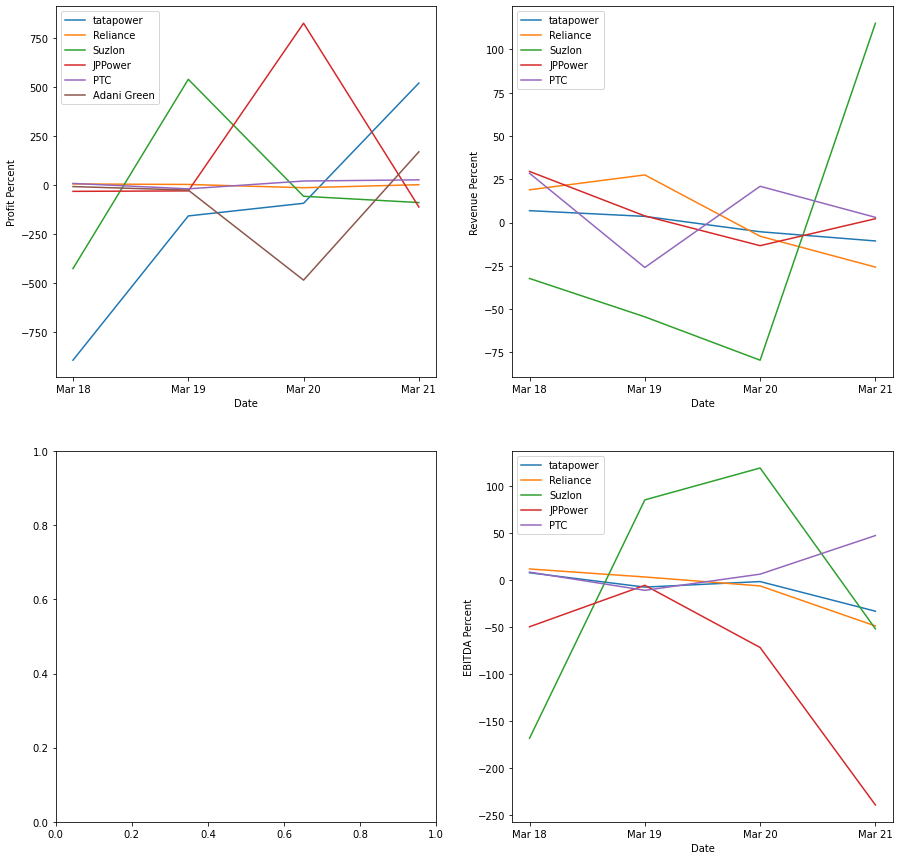

In [196]:
import matplotlib.pyplot as plt
import numpy as np
import math

fig, axs = plt.subplots(2, 2,figsize=(15,15))
# f, axs = plt.subplots(2,2)

# Define X and Y variable data
x = np.array([ 'Mar 18', 'Mar 19', 'Mar 20', 'Mar 21'])
y1 = np.array([cagr_tatapwr_profit18, cagr_tatapwr_profit19, cagr_tatapwr_profit20, cagr_tatapwr_profit21])
y2 = np.array([cagr_reiance_profit18, cagr_reiance_profit19, cagr_reiance_profit20, cagr_reiance_profit21])
y3 = np.array([cagr_suzlon_profit18, cagr_suzlon_profit19, cagr_suzlon_profit20, cagr_suzlon_profit21])
y4 = np.array([cagr_jppower_profit18, cagr_jppower_profit19, cagr_jppower_profit20, cagr_jppower_profit21])
y5 = np.array([cagr_pfs_profit18, cagr_pfs_profit19, cagr_pfs_profit20, cagr_pfs_profit21])
y6 = np.array([cagr_adanigreen_profit18, cagr_adanigreen_profit19, cagr_adanigreen_profit20, cagr_adanigreen_profit21])
# y7 = np.array([cagr_adanireen_profit18, cagr_adanireen_profit19, cagr_adanireen_profit20, cagr_adanireen_profit21])

axs[0, 0].plot(x, y1)
axs[0, 0].plot(x, y2)
axs[0, 0].plot(x, y3)
axs[0, 0].plot(x, y4)
axs[0, 0].plot(x, y5)
axs[0, 0].plot(x, y6)
# plt.plot(x, y7)
axs[0, 0].set_xlabel("Date")  # add X-axis label
axs[0, 0].set_ylabel("Profit Percent")  # add Y-axis label
# plt.title("Any suitable title")  # add title
# axs[0, 0].gca().set_legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))
axs[0, 0].legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))


# axis[0, 0].plot(X, Y1)
# plt.show()
#######################################################################################
x = np.array([ 'Mar 18', 'Mar 19', 'Mar 20', 'Mar 21'])
y1 = np.array([cagr_tatapwr_revenue18, cagr_tatapwr_revenue19, cagr_tatapwr_revenue20, cagr_tatapwr_revenue21])
y2 = np.array([cagr_reiance_revenue18, cagr_reiance_revenue19, cagr_reiance_revenue20, cagr_reiance_revenue21])
y3 = np.array([cagr_suzlon_revenue18, cagr_suzlon_revenue19, cagr_suzlon_revenue20, cagr_suzlon_revenue21])
y4 = np.array([cagr_jppower_revenue18, cagr_jppower_revenue19, cagr_jppower_revenue20, cagr_jppower_revenue21])
y5 = np.array([cagr_pfs_revenue18, cagr_pfs_revenue19, cagr_pfs_revenue20, cagr_pfs_revenue21])
# y6 = np.array([cagr_adanigreen_revenue18, cagr_adanigreen_revenue19, cagr_adanigreen_revenue20, cagr_adanigreen_revenue21])
# y7 = np.array([cagr_adanireen_profit18, cagr_adanireen_profit19, cagr_adanireen_profit20, cagr_adanireen_profit21])

axs[0, 1].plot(x, y1)
axs[0, 1].plot(x, y2)
axs[0, 1].plot(x, y3)
axs[0, 1].plot(x, y4)
axs[0, 1].plot(x, y5)
# plt.plot(x, y6)
# plt.plot(x, y7)
axs[0, 1].set_xlabel('Date')  # add X-axis label
axs[0, 1].set_ylabel("Revenue Percent")  # add Y-axis label
# plt.title("Any suitable title")  # add title
# plt.gca().legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))
# axs[0, 1].gca().set_legend(('tatapower','Reliance','Suzlon','JPPower','PTC'))
axs[0, 1].legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))

#############################################
x = np.array([ 'Mar 18', 'Mar 19', 'Mar 20', 'Mar 21'])
y1 = np.array([cagr_tatapwr_EBITDA18, cagr_tatapwr_EBITDA19, cagr_tatapwr_EBITDA20, cagr_tatapwr_EBITDA21])
y2 = np.array([cagr_reiance_EBITDA18, cagr_reiance_EBITDA19, cagr_reiance_EBITDA20, cagr_reiance_EBITDA21])
y3 = np.array([cagr_suzlon_EBITDA18, cagr_suzlon_EBITDA19, cagr_suzlon_EBITDA20, cagr_suzlon_EBITDA21])
y4 = np.array([cagr_jppower_EBITDA18, cagr_jppower_EBITDA19, cagr_jppower_EBITDA20, cagr_jppower_EBITDA21])
y5 = np.array([cagr_pfs_EBITDA18, cagr_pfs_EBITDA19, cagr_pfs_EBITDA20, cagr_pfs_EBITDA21])
# y6 = np.array([cagr_adanigreen_revenue18, cagr_adanigreen_revenue19, cagr_adanigreen_revenue20, cagr_adanigreen_revenue21])
# y7 = np.array([cagr_adanireen_profit18, cagr_adanireen_profit19, cagr_adanireen_profit20, cagr_adanireen_profit21])

axs[1, 1].plot(x, y1)
axs[1, 1].plot(x, y2)
axs[1, 1].plot(x, y3)
axs[1, 1].plot(x, y4)
axs[1, 1].plot(x, y5)
# plt.plot(x, y6)
# plt.plot(x, y7)
axs[1, 1].set_xlabel('Date')  # add X-axis label
axs[1, 1].set_ylabel("EBITDA Percent")  # add Y-axis label
# plt.title("Any suitaable title")  # add title
# plt.gca().legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))
# axs[0, 1].gca().set_legend(('tatapower','Reliance','Suzlon','JPPower','PTC'))
axs[1, 1].legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))

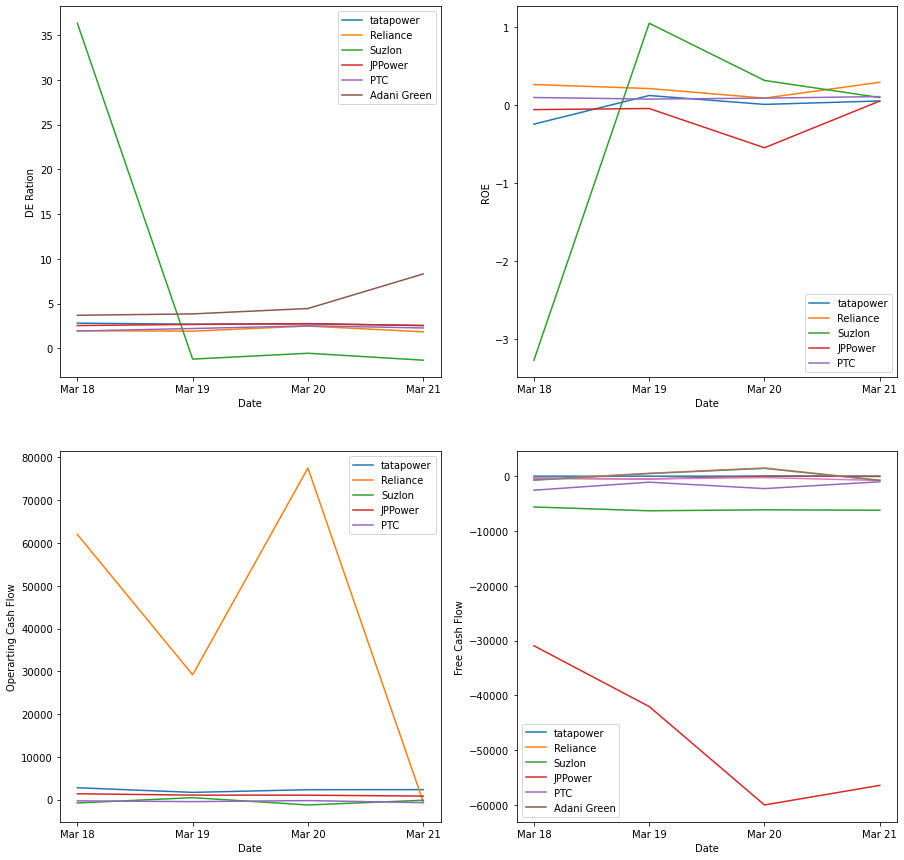

In [205]:
import matplotlib.pyplot as plt
import numpy as np
import math

fig, axs = plt.subplots(2, 2,figsize=(15,15))
# f, axs = plt.subplots(2,2)

# Define X and Y variable data
x = np.array([ 'Mar 18', 'Mar 19', 'Mar 20', 'Mar 21'])
y1 = np.array([value_tatapwr_de18, value_tatapwr_de19, value_tatapwr_de20, value_tatapwr_de21])
y2 = np.array([value_reiance_de18, value_reiance_de19, value_reiance_de20, value_reiance_de21])
y3 = np.array([value_suzlon_de18, value_suzlon_de19, value_suzlon_de20, value_suzlon_de21])
y4 = np.array([value_jppower_de18, value_jppower_de19, value_jppower_de20, value_jppower_de21])
y5 = np.array([value_pfs_de18, value_pfs_de19, value_pfs_de20, value_pfs_de21])
y6 = np.array([value_adanigreen_de18, value_adanigreen_de19, value_adanigreen_de20, value_adanigreen_de21])
# y7 = np.array([cagr_adanireen_profit18, cagr_adanireen_profit19, cagr_adanireen_profit20, cagr_adanireen_profit21])

axs[0, 0].plot(x, y1)
axs[0, 0].plot(x, y2)
axs[0, 0].plot(x, y3)
axs[0, 0].plot(x, y4)
axs[0, 0].plot(x, y5)
axs[0, 0].plot(x, y6)
# plt.plot(x, y7)
axs[0, 0].set_xlabel("Date")  # add X-axis label
axs[0, 0].set_ylabel("DE Ration")  # add Y-axis label
# plt.title("Any suitable title")  # add title
# axs[0, 0].gca().set_legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))
axs[0, 0].legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))


# axis[0, 0].plot(X, Y1)
# plt.show()
#######################################################################################
x = np.array([ 'Mar 18', 'Mar 19', 'Mar 20', 'Mar 21'])
y1 = np.array([value_tatapwr_roe_18, value_tatapwr_roe_19, value_tatapwr_roe_20, value_tatapwr_roe_21])
y2 = np.array([value_reiance_roe_18, value_reiance_roe_19, value_reiance_roe_20, value_reiance_roe_21])
y3 = np.array([value_suzlon_roe_18, value_suzlon_roe_19, value_suzlon_roe_20, value_suzlon_roe_21])
y4 = np.array([value_jppower_roe_18, value_jppower_roe_19, value_jppower_roe_20, value_jppower_roe_21])
y5 = np.array([value_pfs_roe_18, value_pfs_roe_19, value_pfs_roe_20, value_pfs_roe_21])
y6 = np.array([value_adanigreen_roe_18, value_adanigreen_roe_19, value_adanigreen_roe_20, value_adanigreen_roe_21])
# y7 = np.array([cagr_adanireen_profit18, cagr_adanireen_profit19, cagr_adanireen_profit20, cagr_adanireen_profit21])

axs[0, 1].plot(x, y1)
axs[0, 1].plot(x, y2)
axs[0, 1].plot(x, y3)
axs[0, 1].plot(x, y4)
axs[0, 1].plot(x, y5)
plt.plot(x, y6)
# plt.plot(x, y7)
axs[0, 1].set_xlabel('Date')  # add X-axis label
axs[0, 1].set_ylabel("ROE")  # add Y-axis label
# plt.title("Any suitable title")  # add title
# plt.gca().legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))
# axs[0, 1].gca().set_legend(('tatapower','Reliance','Suzlon','JPPower','PTC'))
axs[0, 1].legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))

#############################################

x = np.array([ 'Mar 18', 'Mar 19', 'Mar 20', 'Mar 21'])
y1 = np.array([value_tatapwr_operatingcashflow_18, value_tatapwr_operatingcashflow_19, value_tatapwr_operatingcashflow_20, value_tatapwr_operatingcashflow_21])
y2 = np.array([value_reiance_operatingcashflow_18, value_reiance_operatingcashflow_19, value_reiance_operatingcashflow_20, value_reiance_operatingcashflow_21])
y3 = np.array([value_suzlon_operatingcashflow_18, value_suzlon_operatingcashflow_19, value_suzlon_operatingcashflow_20, value_suzlon_operatingcashflow_21])
y4 = np.array([value_jppower_operatingcashflow_18, value_jppower_operatingcashflow_19, value_jppower_operatingcashflow_20, value_jppower_operatingcashflow_21])
y5 = np.array([value_pfs_operatingcashflow_18, value_pfs_operatingcashflow_19, value_pfs_operatingcashflow_20, value_pfs_operatingcashflow_21])
y6 = np.array([value_adanigreen_operatingcashflow_18, value_adanigreen_operatingcashflow_19, value_adanigreen_operatingcashflow_20, value_adanigreen_operatingcashflow_21])
# y7 = np.array([cagr_adanireen_profit18, cagr_adanireen_profit19, cagr_adanireen_profit20, cagr_adanireen_profit21])

axs[1, 0].plot(x, y1)
axs[1, 0].plot(x, y2)
axs[1, 0].plot(x, y3)
axs[1, 0].plot(x, y4)
axs[1, 0].plot(x, y5)
plt.plot(x, y6)
# plt.plot(x, y7)
axs[1, 0].set_xlabel('Date')  # add X-axis label
axs[1, 0].set_ylabel("Operarting Cash Flow")  
    # add Y-axis label
# plt.title("Any suitable title")  # add title
# plt.gca().legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))
# axs[0, 1].gca().set_legend(('tatapower','Reliance','Suzlon','JPPower','PTC'))
axs[1, 0].legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))


######################################################
x = np.array([ 'Mar 18', 'Mar 19', 'Mar 20', 'Mar 21'])
y1 = np.array([value_tatapwr_freecashflow_18, value_tatapwr_freecashflow_19, value_tatapwr_freecashflow_20, value_tatapwr_freecashflow_21])
y2 = np.array([value_reiance_freecashflow_18, value_reiance_freecashflow_19, value_reiance_freecashflow_20, value_reiance_freecashflow_21])
y3 = np.array([value_suzlon_freecashflow_18, value_suzlon_freecashflow_19, value_suzlon_freecashflow_20, value_suzlon_freecashflow_21])
y4 = np.array([value_jppower_freecashflow_18, value_jppower_freecashflow_19, value_jppower_freecashflow_20, value_jppower_freecashflow_21])
y5 = np.array([value_pfs_freecashflow_18, value_pfs_freecashflow_19, value_pfs_freecashflow_20, value_pfs_freecashflow_21])
y6 = np.array([value_adanigreen_freecashflow_18, value_adanigreen_freecashflow_19, value_adanigreen_freecashflow_20, value_adanigreen_freecashflow_21])
# y7 = np.array([cagr_adanireen_profit18, cagr_adanireen_profit19, cagr_adanireen_profit20, cagr_adanireen_profit21])

axs[1, 1].plot(x, y1)
axs[1, 1].plot(x, y2)
axs[1, 1].plot(x, y3)
axs[1, 1].plot(x, y4)
axs[1, 1].plot(x, y5)
plt.plot(x, y6)
# plt.plot(x, y7)
axs[1, 1].set_xlabel('Date')  # add X-axis label
axs[1, 1].set_ylabel("Free Cash Flow")  # add Y-axis label
# plt.title("Any suitable title")  # add title
# plt.gca().legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))
# axs[0, 1].gca().set_legend(('tatapower','Reliance','Suzlon','JPPower','PTC'))
axs[1, 1].legend(('tatapower','Reliance','Suzlon','JPPower','PTC','Adani Green'))


In [191]:
# import matplotlib.pyplot as plt
# import numpy as np
# import math

# fig, axs = plt.subplots(2, 2)
# x = np.array([ 'Mar 18', 'Mar 19', 'Mar 20', 'Mar 21'])
# y1 = np.array([cagr_tatapwr_profit18, cagr_tatapwr_profit19, cagr_tatapwr_profit20, cagr_tatapwr_profit21])
# y2 = np.array([cagr_reiance_profit18, cagr_reiance_profit19, cagr_reiance_profit20, cagr_reiance_profit21])
# y3 = np.array([cagr_suzlon_profit18, cagr_suzlon_profit19, cagr_suzlon_profit20, cagr_suzlon_profit21])
# y4 = np.array([cagr_jppower_profit18, cagr_jppower_profit19, cagr_jppower_profit20, cagr_jppower_profit21])
# y5 = np.array([cagr_pfs_profit18, cagr_pfs_profit19, cagr_pfs_profit20, cagr_pfs_profit21])
# y6 = np.array([cagr_adanigreen_profit18, cagr_adanigreen_profit19, cagr_adanigreen_profit20, cagr_adanigreen_profit21])


# y7 = np.array([cagr_tatapwr_revenue18, cagr_tatapwr_revenue19, cagr_tatapwr_revenue20, cagr_tatapwr_revenue21])
# y8 = np.array([cagr_reiance_revenue18, cagr_reiance_revenue19, cagr_reiance_revenue20, cagr_reiance_revenue21])
# y9 = np.array([cagr_suzlon_revenue18, cagr_suzlon_revenue19, cagr_suzlon_revenue20, cagr_suzlon_revenue21])
# y10 = np.array([cagr_jppower_revenue18, cagr_jppower_revenue19, cagr_jppower_revenue20, cagr_jppower_revenue21])
# y11 = np.array([cagr_pfs_revenue18, cagr_pfs_revenue19, cagr_pfs_revenue20, cagr_pfs_revenue21])
# # y12 = np.array([cagr_adanigreen_revenue18, cagr_adanigreen_revenue19, cagr_adanigreen_revenue20, cagr_adanigreen_revenue21])

# fig = plt.figure()
# ax = fig.add_subplot(111)    # The big subplot
# ax1 = fig.add_subplot(211)
# ax2 = fig.add_subplot(212)

# # Turn off axis lines and ticks of the big subplot


# ax.plot(x, y1)
# ax.plot(x, y2)
# ax.plot(x, y3)
# ax.plot(x, y4)
# ax.plot(x, y5)
# ax.plot(x, y6)

# ax.set_xlabel('Date')
# ax.set_ylabel('Profit Percent')

# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# ax1.loglog(x, y7)
# ax1.loglog(x, y8)
# ax1.plot(x, y9)
# ax1.plot(x, y10)
# ax1.plot(x, y11)
# # ax1.plot(x, y12)
# # Set common labels
# ax.set_xlabel('Date')
# ax.set_ylabel('Profit Percent')

# ax1.set_title('Date')
# ax2.set_title('Revenue Percent')

# # plt.savefig('common_labels.png', dpi=300)

In [174]:
cagr_suzlon_profit21

array([-87.84116608])